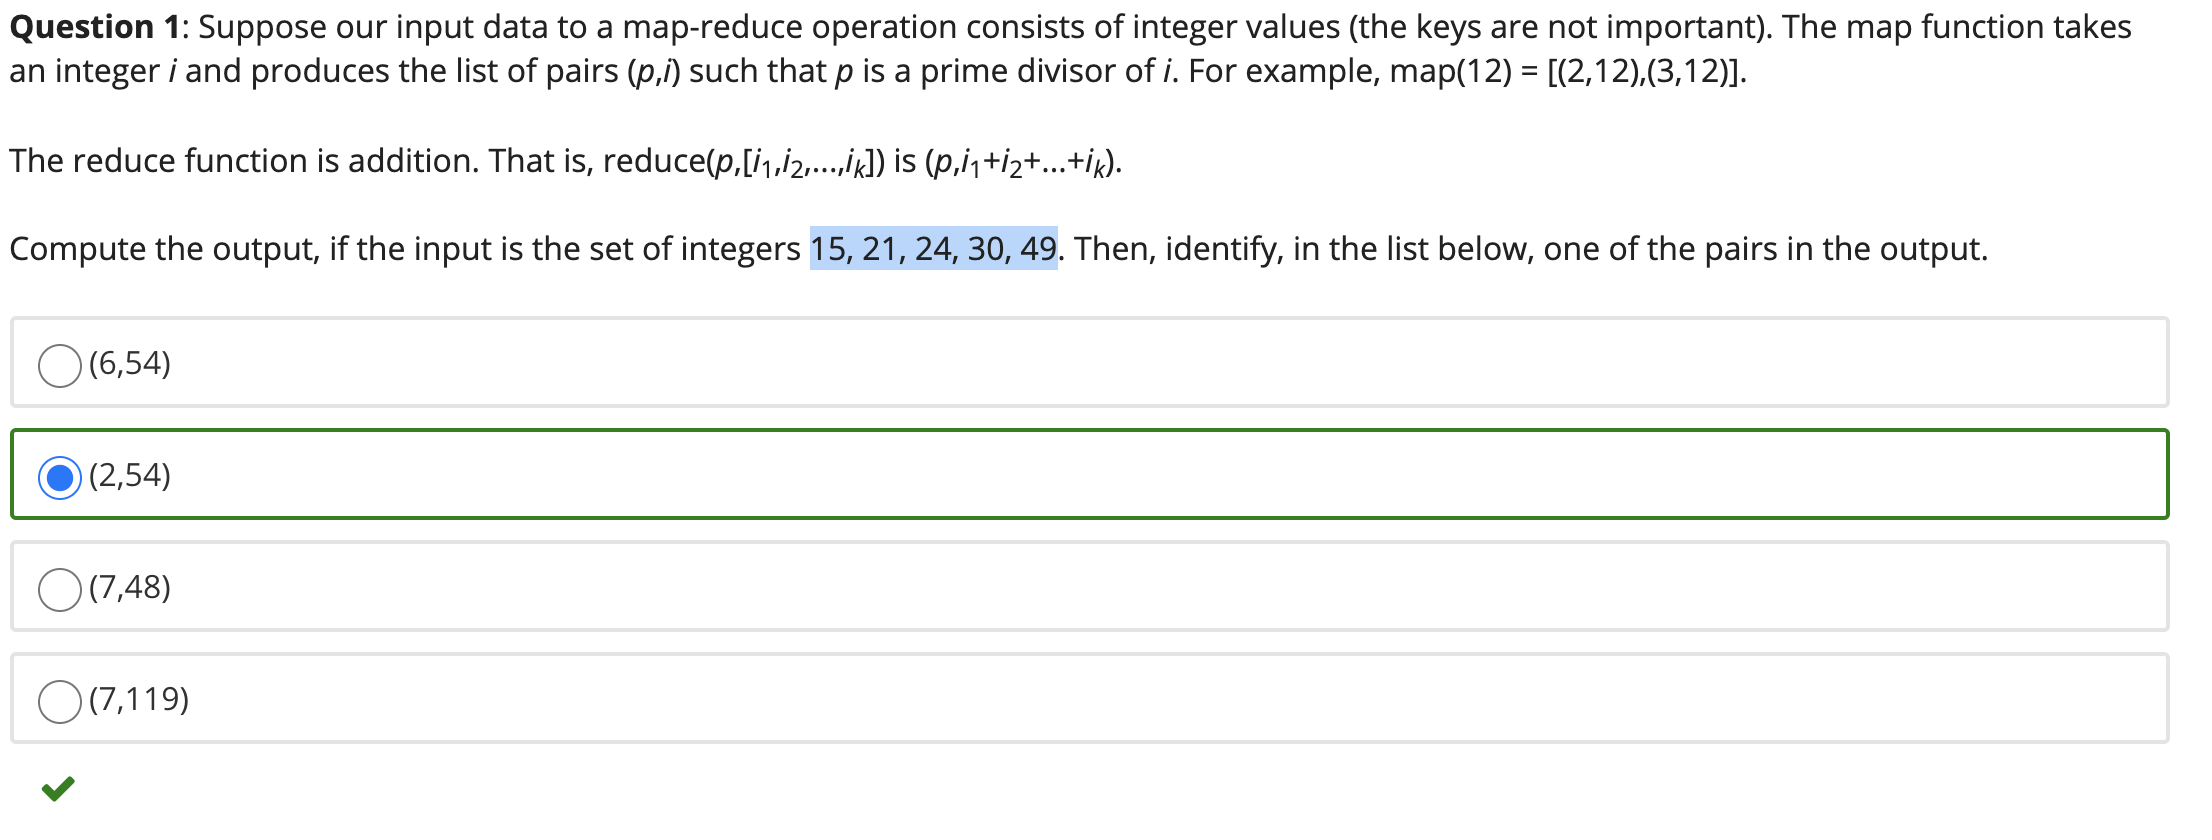

In [37]:
from IPython.display import Image, Video
Image("mapReduce_1.png",width=700,height=500)

In [36]:
from math import ceil, sqrt
import numpy as NP

# Get the prime divisors of a number.
# This function come from http://codereview.stackexchange.com/questions/19509/functional-prime-factor-generator
def factor(n):
    if n <= 1: return []
    prime = next((x for x in range(2, ceil(sqrt(n))+1) if n%x == 0), n)
    # Recursive call
    result = [prime] + factor(n//prime)
    # This algorithm return duplicated values. Let's return an array of unique values
    result = list(set(result))
    return result

# Set the list of integer to process
integers = [15, 21, 24, 30, 49]

# Store pairs
pairs = []

# Map function creating every pairs
def map(n):
    factors = factor(n)
    map_keys = []
    for num in factors:
        map_keys.append((num, n))
    return map_keys

# Reduce function summing the values of every keys
def reduce(pairs):
    result = dict()
    last_key = None
    for pair in pairs:
        key = pair[0]
        if key == last_key:
            result[key] += pair[1]
        else:
            result[key] = pair[1]
        last_key = key
    return result

# Create pairs by calling map function for every integers
for integer in integers:
    tuples = map(integer)
    for single_tuple in tuples:
        pairs.append(single_tuple)
        
print("Mapping integer to prime number")
print(pairs)
        
# Sort pairs by key
pairs = sorted(pairs, key=lambda key: key[0])

print()
print("Sorting prime number")
print(pairs)

# Reduce pairs to get the results
reduced_pairs = reduce(pairs)

print()
print("Reducing number pairs")
print(reduced_pairs)

# Print results
# 6 not present
print("2,54: {0}".format(reduced_pairs[2] == 54))
print("7,48: {0}".format(reduced_pairs[7] == 48))
print("7,119: {0}".format(reduced_pairs[7] == 119))

Mapping integer to prime number
[(3, 15), (5, 15), (3, 21), (7, 21), (2, 24), (3, 24), (2, 30), (3, 30), (5, 30), (7, 49)]

Sorting prime number
[(2, 24), (2, 30), (3, 15), (3, 21), (3, 24), (3, 30), (5, 15), (5, 30), (7, 21), (7, 49)]

Reducing number pairs
{2: 54, 3: 90, 5: 45, 7: 70}
2,54: True
7,48: False
7,119: False


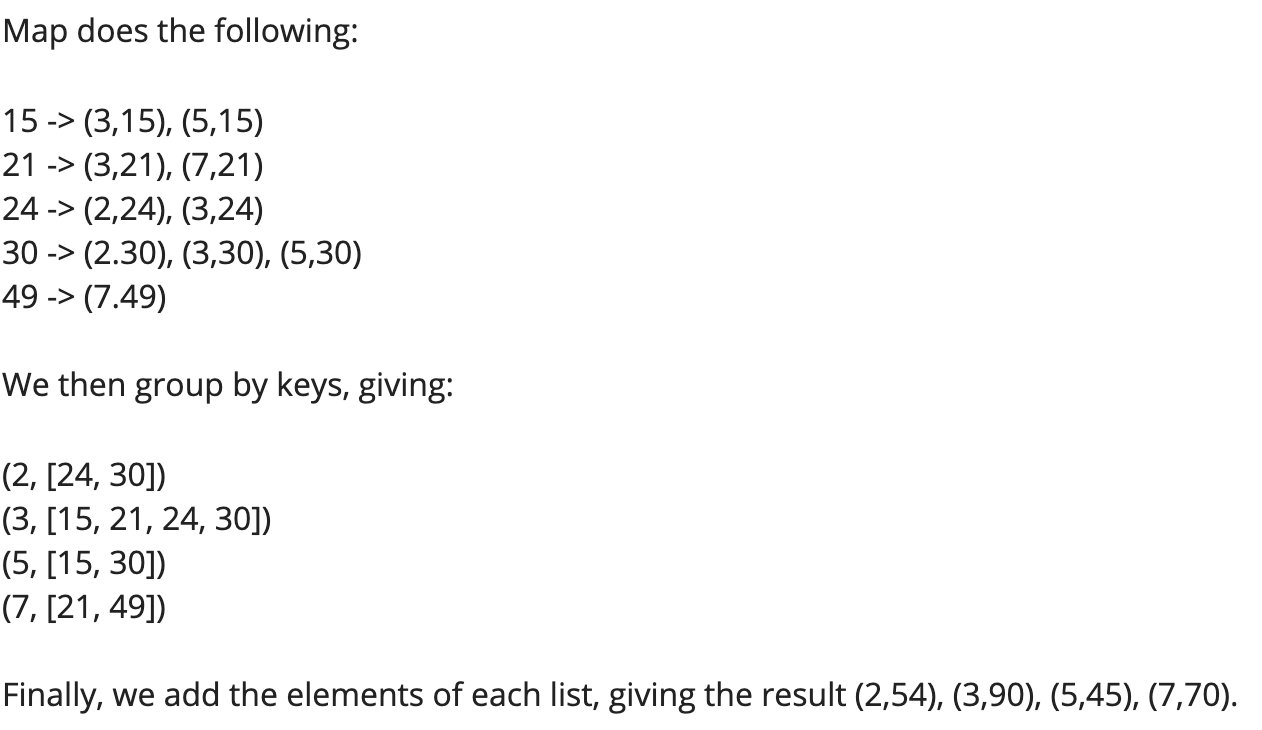

In [38]:
Image("mapReduce_2.png",width=700,height=500)